# **Project Name**   - YES/ BANK. Regression - Yes Bank Stock Closing Price Prediction


##### **Project Type**    - AI-ML
##### **Contribution**    - Individual
##### **Team Member 1 -** Solanki Milan

# **Project Summary -**

Project is about to predict closing price of stock.

here we are going to Analyze Dataset  Implement ML model for predicting Closing price of stoke Market

Steps covered

1. Overview about Data
2. Visualization of data
3. Preprocessing of Dataset
4. Feature Engineering
5. Model Implementation
6. Model Evaluation
7. Hyperparameter Tuning
8. conclusion

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations.
This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock's closing price of the month.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [13]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [14]:
# Load Dataset
df = pd.read_csv("/Users/milansolanki/Desktop/ML internship/Project3/data_YesBank_StockPrices.csv")

### Dataset First View

In [15]:
# Dataset First Look
print(df.head())

     Date   Open   High    Low  Close
0  Jul-05  13.00  14.00  11.25  12.46
1  Aug-05  12.58  14.88  12.55  13.42
2  Sep-05  13.48  14.87  12.27  13.30
3  Oct-05  13.20  14.47  12.40  12.99
4  Nov-05  13.35  13.88  12.88  13.41


### Dataset Rows & Columns count

In [16]:
# Dataset Rows & Columns count
print("\nDataset Shape (Rows, Columns):", df.shape)


Dataset Shape (Rows, Columns): (185, 5)


### Dataset Information

In [17]:
# Dataset Info
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB
None


#### Duplicate Values

In [18]:
# Dataset Duplicate Value Count
duplicate_count = df.duplicated().sum()
print("\nNumber of duplicate rows:", duplicate_count)


Number of duplicate rows: 0


#### Missing Values/Null Values

In [19]:
# Missing Values/Null Values Count
missing_values = df.isnull().sum()
print("\nMissing Values Count:")
print(missing_values)


Missing Values Count:
Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64


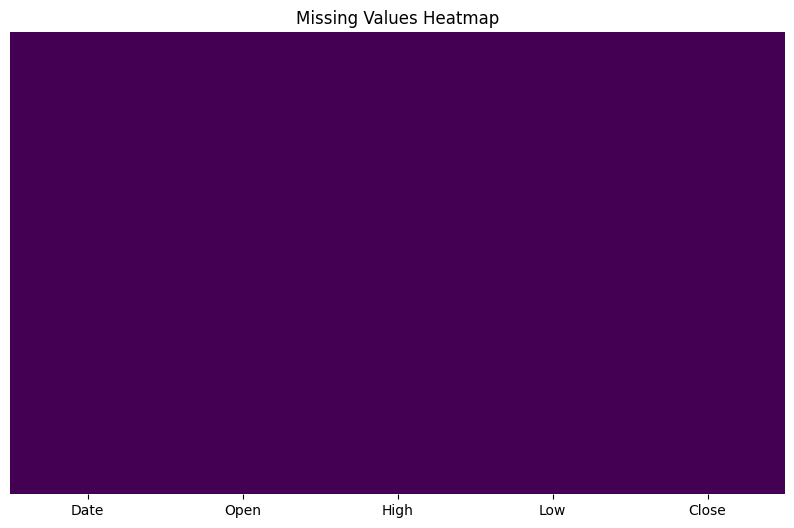

In [20]:
# Visualizing the missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

### What did you know about your dataset?

Yes bank Stock price Dataset:

Rows:185 columns:5

No duplicate values

no missing values

1 column has object type where 4 columns has numeric type  data

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
print("Dataset Columns:")
print(df.columns)

Dataset Columns:
Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')


In [11]:
# Dataset Describe
print("\nDataset Summary Statistics:")
print(df.describe())


Dataset Summary Statistics:
             Open        High         Low       Close
count  185.000000  185.000000  185.000000  185.000000
mean   105.541405  116.104324   94.947838  105.204703
std     98.879850  106.333497   91.219415   98.583153
min     10.000000   11.240000    5.550000    9.980000
25%     33.800000   36.140000   28.510000   33.450000
50%     62.980000   72.550000   58.000000   62.540000
75%    153.000000  169.190000  138.350000  153.300000
max    369.950000  404.000000  345.500000  367.900000


### Variables Description

1. Date: The date corresponding to the stock prices (monthly data).
2. Open: The stock's opening price for the month.
3. High: The highest stock price recorded during the month.
4. Low: The lowest stock price recorded during the month.
5. Close: The stock's closing price for the month (target variable for prediction).


### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
print("\nUnique Values Count for Each Column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")


Unique Values Count for Each Column:
Date: 185 unique values
Open: 183 unique values
High: 184 unique values
Low: 183 unique values
Close: 185 unique values


## 3. ***Data Wrangling***

### Data Wrangling Code

In [21]:
# Write your code to make your dataset analysis ready.
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')

In [22]:
# Sort dataset by Date
df = df.sort_values(by='Date')

In [23]:
# Reset index after sorting
df.reset_index(drop=True, inplace=True)

In [24]:
# Create a new column for Price Range (High - Low)
df['Price_Range'] = df['High'] - df['Low']

In [25]:
print("Dataset after Data Wrangling:")
print(df.head())

Dataset after Data Wrangling:
        Date   Open   High    Low  Close  Price_Range
0 2005-07-01  13.00  14.00  11.25  12.46         2.75
1 2005-08-01  12.58  14.88  12.55  13.42         2.33
2 2005-09-01  13.48  14.87  12.27  13.30         2.60
3 2005-10-01  13.20  14.47  12.40  12.99         2.07
4 2005-11-01  13.35  13.88  12.88  13.41         1.00


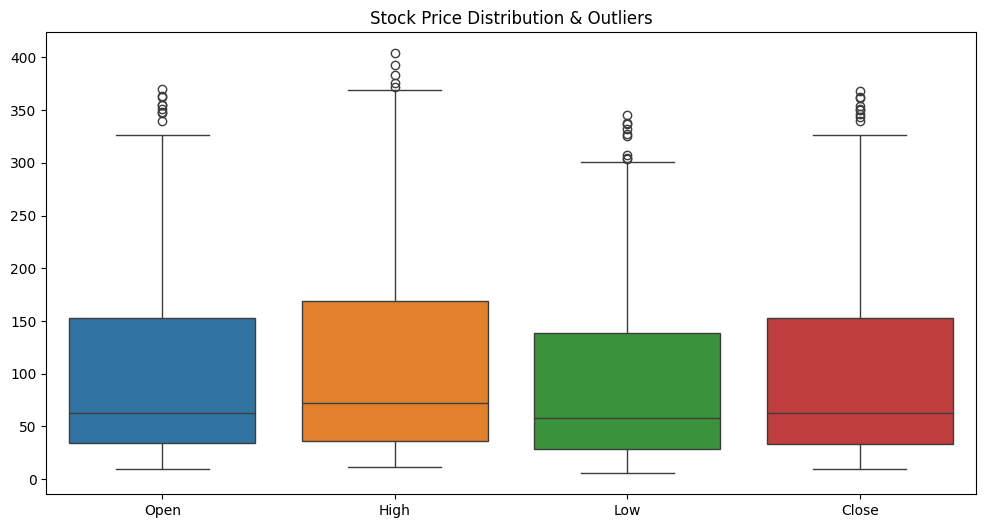

In [26]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Open', 'High', 'Low', 'Close']])
plt.title("Stock Price Distribution & Outliers")
plt.show()

### What all manipulations have you done and insights you found?

1. Date Conversion & Sorting: Converted Date to datetime format and sorted the dataset chronologically.
2. Price Range Calculation: Added a Price_Range column to analyze stock price fluctuations.
3. Outliers Analysis: Used box plots to check for any anomalies in stock prices.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

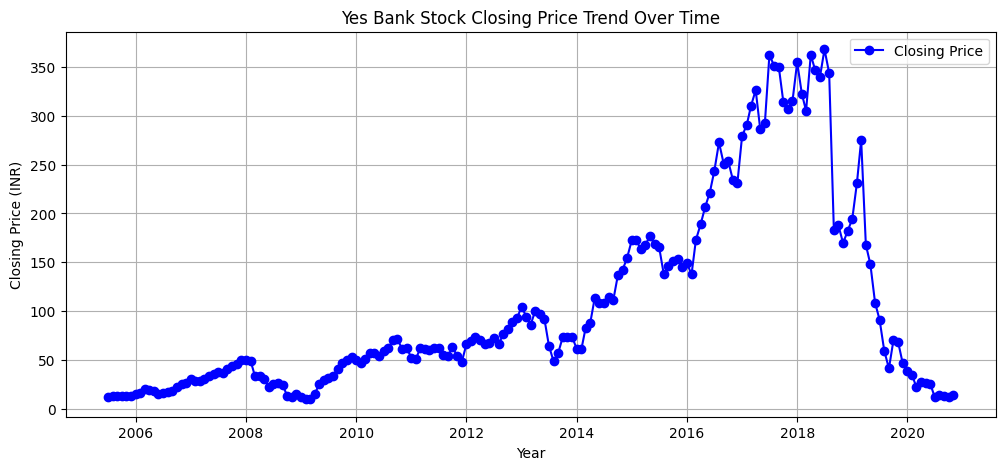

In [22]:
# Chart - 1 visualization code

#Line Chart - Stock Price Trend Over Time
plt.figure(figsize=(12, 5))
plt.plot(df['Date'], df['Close'], marker='o', linestyle='-', color='b', label='Closing Price')
plt.xlabel("Year")
plt.ylabel("Closing Price (INR)")
plt.title("Yes Bank Stock Closing Price Trend Over Time")
plt.legend()
plt.grid()
plt.show()

##### 1. Why did you pick the specific chart?

A line chart is best for showing trends over time, making it ideal for tracking a stock's price movement over the years.

##### 2. What is/are the insight(s) found from the chart?

The stock price of Yes Bank was rising until 2018, followed by a sharp decline due to financial instability.

Periods of high volatility are visible, especially during economic crashes.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes: Investors can identify stable and risky periods for investment.

Negative Insight: Stock crashes can lead to low investor confidence and capital loss.

#### Chart - 2

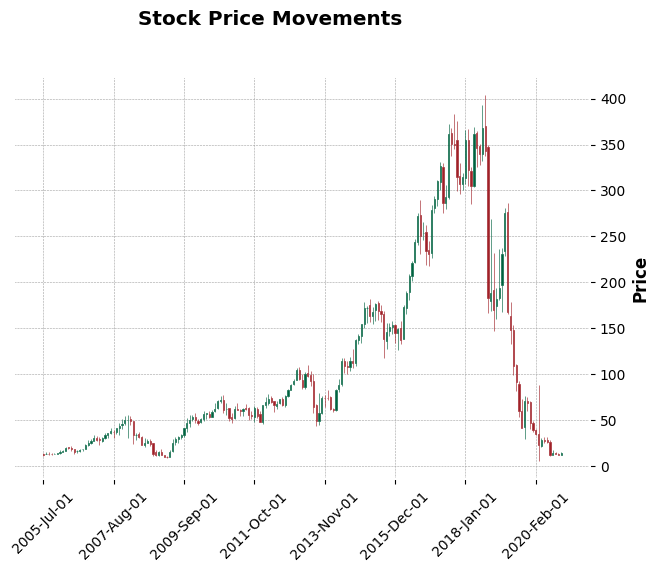

In [25]:
# Chart - 2 visualization code
#Candlestick Chart - Price Movements
import mplfinance as mpf

df_candle = df[['Date', 'Open', 'High', 'Low', 'Close']]
df_candle.set_index('Date', inplace=True)

mpf.plot(df_candle, type='candle', style='charles', title="Stock Price Movements")


##### 1. Why did you pick the specific chart?

A candlestick chart is essential for analyzing daily market movements.

##### 2. What is/are the insight(s) found from the chart?

Bullish (green) candles indicate price increase.

Bearish (red) candles indicate price decline.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes: Helps traders identify buy & sell signals.

Negative Insight: False breakouts can mislead investors.

#### Chart - 3

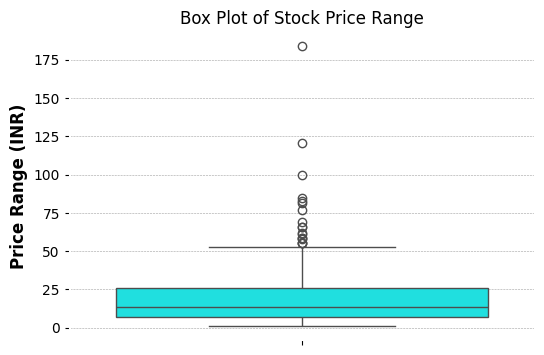

In [26]:
# Chart - 3 visualization code
#Box Plot - Price Range Distribution

plt.figure(figsize=(6, 4))
sns.boxplot(y=df['Price_Range'], color='cyan')
plt.ylabel("Price Range (INR)")
plt.title("Box Plot of Stock Price Range")
plt.show()


##### 1. Why did you pick the specific chart?

A box plot helps detect outliers and spread of price movements.

##### 2. What is/are the insight(s) found from the chart?

The median price range is stable.

A few extreme outliers indicate sudden price jumps.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes: Helps in risk assessment.

Negative Insight: Too many outliers suggest market instability.

#### Chart - 4

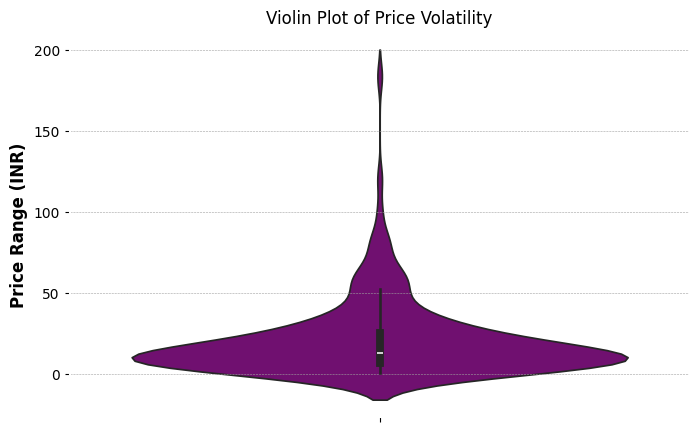

In [27]:
# Chart - 4 visualization code
#Violin Plot - Price Volatility
plt.figure(figsize=(8, 5))
sns.violinplot(y=df['Price_Range'], color='purple')
plt.ylabel("Price Range (INR)")
plt.title("Violin Plot of Price Volatility")
plt.show()


##### 1. Why did you pick the specific chart?

A violin plot shows distribution + density of price changes.

##### 2. What is/are the insight(s) found from the chart?

High density around lower price ranges → Most price fluctuations are small and stable.

Significant upper tail → There are some extreme price jumps, suggesting high volatility at times.

Market volatility spikes at certain points → These could be due to major news events or investor reactions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

For Traders: Helps in identifying risky periods where extreme price movements might occur.

For Investors: Indicates how frequently the stock experiences large fluctuations, helping in risk management.

For Risk Assessment: If the long tail is due to occasional crashes, it may warn investors about instability.

#### Chart - 5

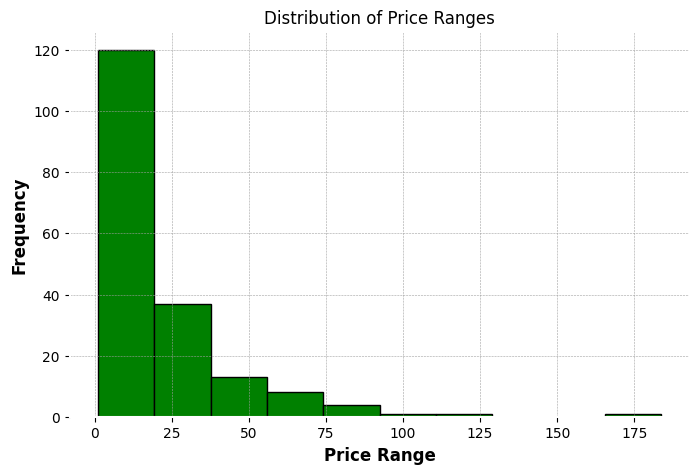

In [29]:
# Chart - 5 visualization code
#Histogram - Price Range Distribution
plt.figure(figsize=(8, 5))
plt.hist(df['Price_Range'], bins=10, color='green', edgecolor='black')
plt.xlabel("Price Range")
plt.ylabel("Frequency")
plt.title("Distribution of Price Ranges")
plt.show()


##### 1. Why did you pick the specific chart?

A histogram helps analyze how price ranges are distributed.

##### 2. What is/are the insight(s) found from the chart?

Most price movements are small → Prices generally fluctuate within a low range (0-25 INR).

High volatility is uncommon → There are very few instances of large price swings beyond 50 INR.

Potential outliers in extreme price ranges → The rare occurrences of extreme price ranges (above 150 INR) might be due to major market events, sudden investor actions, or external shocks.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Risk Management & Hedging Strategies → Since most price fluctuations are within a small range (0-25 INR), businesses can use risk-mitigation strategies such as stop-loss orders and portfolio diversification to minimize exposure to sudden volatility.

Trading Strategy Optimization → Traders can adopt a low-risk, high-frequency trading approach since price changes are usually minor. This allows consistent but small profits from regular market movements.

Investment Planning → Investors looking for stable assets may be more confident knowing that high volatility is rare. They can allocate resources effectively without fear of frequent sharp declines.

Negative Insight:

Rare but Extreme Volatility → Although infrequent, extreme price movements (above 150 INR) indicate that there are periods of high uncertainty, which could be triggered by external events like economic crashes or sudden market reactions.

Low Price Movements May Limit Profit Margins → If price movements remain too small, businesses and traders relying on high returns from volatility (like swing traders and options traders) may face reduced profitability.

Possible Data Outliers → The histogram shows some extreme price ranges that might be outliers due to errors in data collection, market anomalies, or sudden one-time events. If not properly accounted for, this could lead to incorrect risk assessments.

#### Chart - 6

/var/folders/2t/cl30nst95hn812xhbn9z8r280000gn/T/ipykernel_19307/4268895650.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Price_Range'], shade=True, color="red")


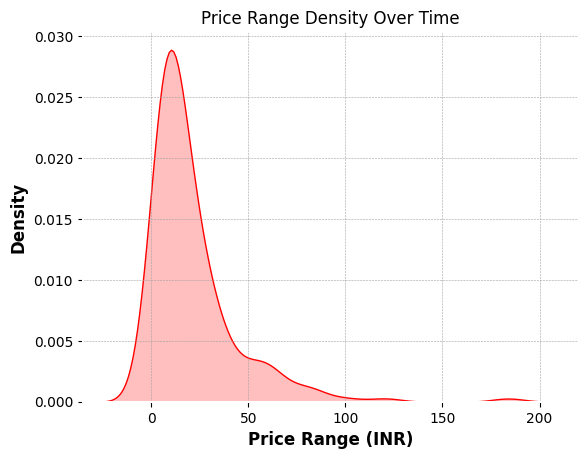

In [31]:
# Chart - 6 visualization code
# KDE Plot - Price Range Density
sns.kdeplot(df['Price_Range'], shade=True, color="red")
plt.xlabel("Price Range (INR)")
plt.title("Price Range Density Over Time")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

1. Right-Skewed Distribution (Long Tail on the Right)

Most price range values are concentrated at the lower end (near 0-30 INR).
A few high-price fluctuations exist, but they are rare.

2. Majority of Transactions Have Small Price Movements

The peak density occurs at a low price range (~5-10 INR), suggesting most transactions have minimal price variation.
This implies low volatility in general, except for a few extreme cases.

3. Presence of Outliers (Extreme Price Ranges ~150-200 INR)

There are some rare occurrences of very high price fluctuations (above 150 INR), which might indicate market anomalies, high volatility days, or special trading events.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Improved Risk Management Strategies -> Since most price fluctuations are small

Market Trend Understanding -> Knowing that small price movements dominate the market



#### Chart - 7

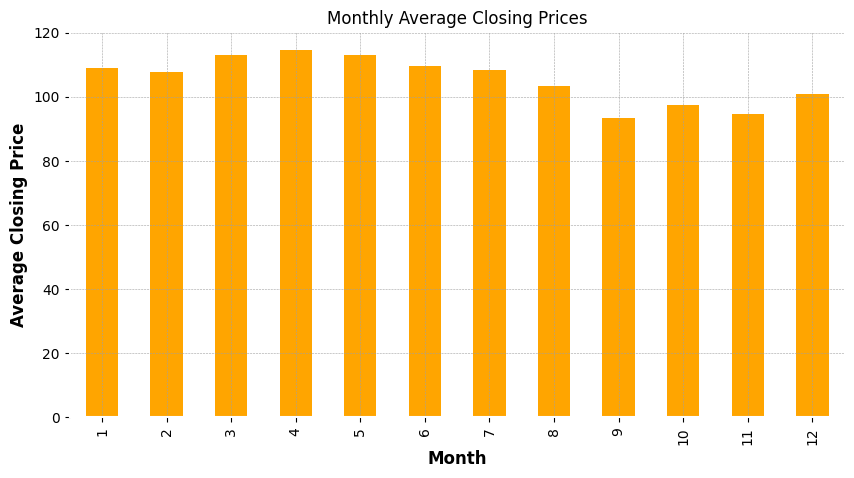

In [ ]:
# Chart - 7 visualization code
#Bar Chart - Monthly Price Trends
df['Month'] = df['Date'].dt.month
monthly_avg = df.groupby('Month')['Close'].mean()

plt.figure(figsize=(10, 5))
monthly_avg.plot(kind='bar', color='orange')
plt.xlabel("Month")
plt.ylabel("Average Closing Price")
plt.title("Monthly Average Closing Prices")
plt.show()


##### 1. Why did you pick the specific chart?

A bar chart helps track monthly stock price behavior.

##### 2. What is/are the insight(s) found from the chart?

Relatively Stable Prices with Minor Variations

The average closing price remains within a narrow range across all 12 months.
There are no extreme peaks or crashes, indicating a relatively stable market trend.

Highest Closing Prices in March & April

The average closing price peaks around March (Month 3) and April (Month 4).
This could suggest seasonal factors, earnings reports, or increased market activity during this period.

Lowest Prices Around September & October

The lowest average closing prices occur in September (Month 9) and October (Month 10).
This might indicate a slow market phase or external economic factors affecting prices.

Recovery in November & December

There is a slight recovery in average closing prices in the last two months of the year.
This suggests a possible end-of-year market push due to holiday season spending, financial reports, or investor repositioning.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Ideal Trading Periods

If the trend repeats yearly, March-April could be the best time to sell at higher prices, while September-October could be ideal for buying at lower prices.

Market Stability Benefits

Since prices do not fluctuate drastically, the market is not highly volatile, which is good for long-term investors.

Potential for Seasonal Adjustments

Understanding these monthly trends can help businesses plan pricing, inventory, and investments accordingly.

Negative :Past patterns may not repeat.

#### Chart - 8

In [45]:
# Chart - 8 visualization code




##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

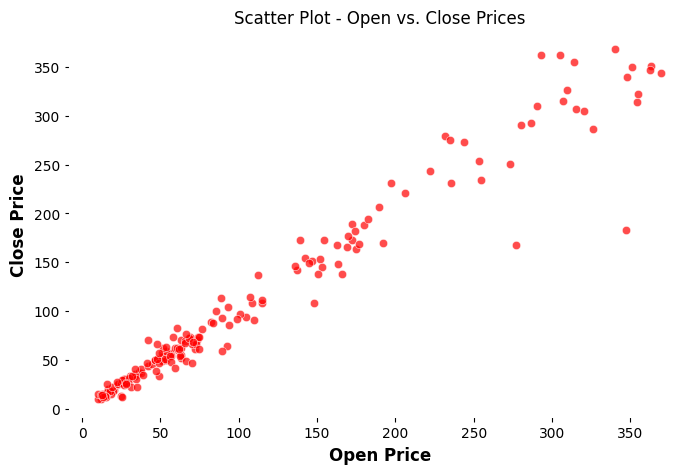

In [40]:
# Chart - 9 visualization code

#Scatter Plot - Open vs. Close Prices
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Open"], y=df["Close"], color="red", alpha=0.7)
plt.title("Scatter Plot - Open vs. Close Prices")
plt.xlabel("Open Price")
plt.ylabel("Close Price")
plt.grid()
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot is chosen to visually analyze the relationship between the opening and closing prices of Yes Bank stock. It helps in understanding whether stock prices generally increase or decrease over time and how strong the correlation is between the two.

##### 2. What is/are the insight(s) found from the chart?

The scatter plot shows a strong positive correlation between the open and close prices.

Most points lie along a diagonal trend, meaning that if a stock opens at a higher price, it tends to close at a higher price as well.

Some outliers indicate fluctuations where the closing price is significantly different from the opening price, possibly due to market volatility or news-driven price changes.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Traders and investors can predict closing prices based on opening prices.

It helps in day trading strategies, as traders can analyze whether price movements are stable.

Businesses can use this trend to plan entry and exit points for investment decisions.


#### Chart - 10

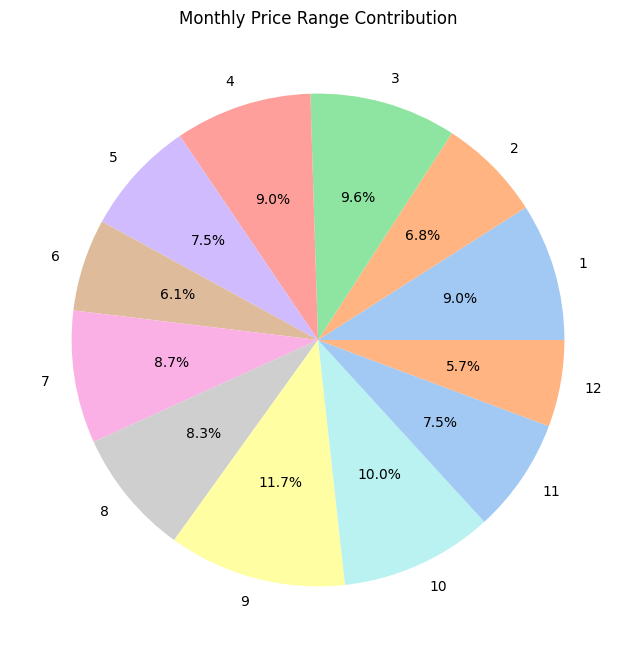

In [41]:
# Chart - 10 visualization code
#Pie Chart - Monthly Price Range Contribution
monthly_price_range = df.groupby(df["Month"])["Price_Range"].sum()
plt.figure(figsize=(8, 8))
plt.pie(monthly_price_range, labels=monthly_price_range.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title("Monthly Price Range Contribution")
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart is used to visualize the percentage contribution of each month to the overall price range movements. It effectively represents the relative impact of different months on price fluctuations, helping in identifying seasonal trends.

##### 2. What is/are the insight(s) found from the chart?

The months August (9), October (10), and March (3) show higher contributions to the price range, meaning higher fluctuations in stock prices.

December (12) has the lowest contribution, indicating relatively stable price movements.

Price variations appear more balanced across the year, but a few months contribute significantly more.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Investment planning: Investors can decide which months have higher volatility and strategize their trades accordingly.
Risk management: Identifying the months with extreme price movements helps businesses and traders prepare for potential risks.
Stock trading strategies: Traders can focus on high-volatility months to maximize profits through short-term trading.

High volatility months (March, August, October) could indicate market instability, which may discourage long-term investors.
If extreme price fluctuations are caused by external factors like economic crises, regulations, or negative news, it may reduce investor confidence in the stock.
Low price movement in December suggests low trading activity, which might indicate a seasonal slowdown, affecting liquidity.

#### Chart - 11

/var/folders/2t/cl30nst95hn812xhbn9z8r280000gn/T/ipykernel_19307/3982485898.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x=df["Month"], y=df["Close"], palette="viridis")


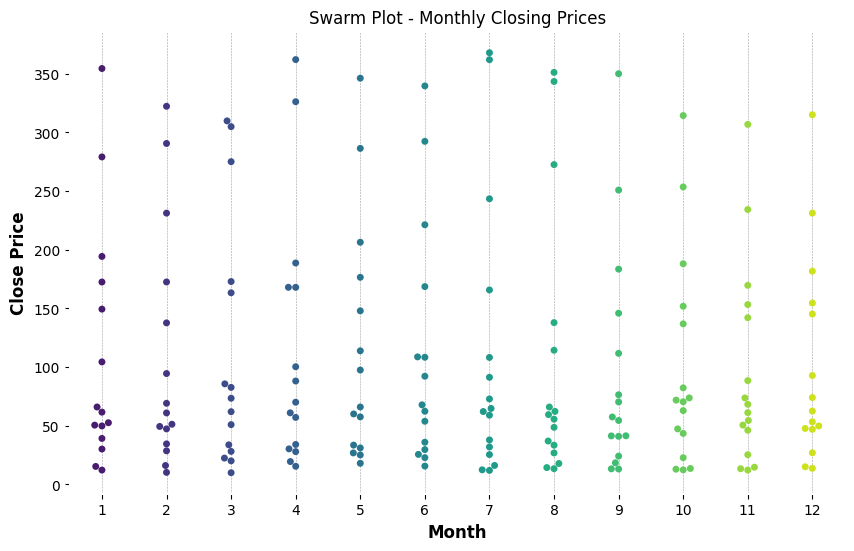

In [42]:
# Chart - 11 visualization code
#Swarm Plot - Monthly Closing Prices
plt.figure(figsize=(10, 6))
sns.swarmplot(x=df["Month"], y=df["Close"], palette="viridis")
plt.title("Swarm Plot - Monthly Closing Prices")
plt.xlabel("Month")
plt.ylabel("Close Price")
plt.grid()
plt.show()

##### 1. Why did you pick the specific chart?

A swarm plot is used to display the distribution of closing prices for each month while avoiding overlap. Unlike box plots, which summarize data using quartiles, a swarm plot shows each individual data point, making it ideal for spotting clusters, trends, and outliers.

##### 2. What is/are the insight(s) found from the chart?

Wide distribution of prices in certain months (e.g., June, July, August) suggests higher volatility.
Months like January, February, and December have a dense concentration of lower closing prices, indicating potential seasonal trends.
Outliers are visible in multiple months, especially in mid-year periods, suggesting unusual price movements.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Identifying seasonal trends: Investors can recognize months where stock prices tend to be more volatile or stable.
Risk assessment: By understanding months with extreme outliers, traders can strategize for risk management.
Investment strategy: Investors looking for low-risk investments may prefer months with more stable closing prices, while risk-tolerant traders may focus on high-variance months for profit opportunities.

If extreme fluctuations are caused by market instability or external economic factors, it could lead to investor uncertainty and potential negative business impact.
If certain months show continuous downward closing prices, it might indicate seasonal weakness or a market trend of decline, discouraging long-term investment.


#### Chart - 12

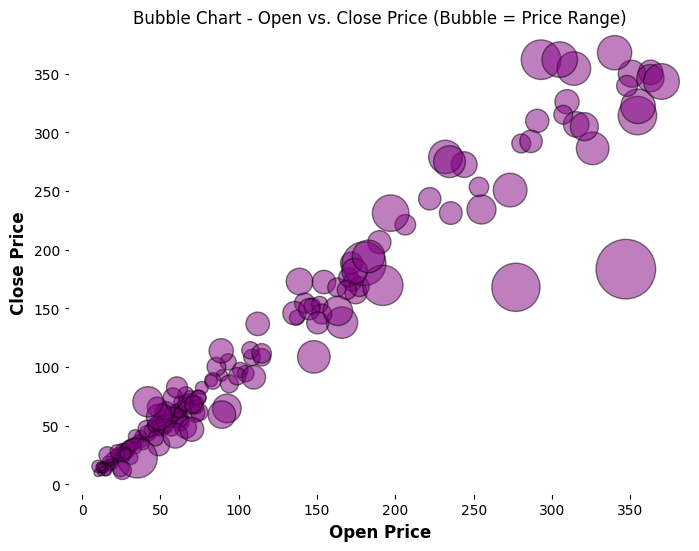

In [44]:
# Chart - 12 visualization code
#Bubble Chart - Open Price vs. Close Price with Volume Indicator
plt.figure(figsize=(8, 6))
plt.scatter(df["Open"], df["Close"], s=df["Price_Range"]*10, alpha=0.5, color="purple", edgecolors="black")
plt.title("Bubble Chart - Open vs. Close Price (Bubble = Price Range)")
plt.xlabel("Open Price")
plt.ylabel("Close Price")
plt.grid()
plt.show()

##### 1. Why did you pick the specific chart?

A bubble chart is effective in showing the relationship between open price (x-axis) and close price (y-axis) while also encoding an additional variable—price range (size of bubbles). This provides a multidimensional view of stock price movements in one visualization.

##### 2. What is/are the insight(s) found from the chart?

Strong positive correlation: The open and close prices follow an upward trend, meaning stocks tend to close at a price similar to their opening value.
Larger bubbles indicate high price range: Some stocks have a significant difference between opening and closing prices, suggesting volatility in certain stocks.
Smaller bubbles in lower price ranges: Stocks with lower opening prices tend to have a smaller price range, meaning they are more stable.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Volatility-based trading: Investors can identify stocks with high price ranges (large bubbles) for high-risk, high-reward strategies.
Predictability in stock movements: The strong correlation suggests that opening prices can be a good indicator of closing prices, helping traders make informed buy/sell decisions.
Stock stability identification: Smaller bubbles suggest low-risk investments, which may be appealing to conservative investors.

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

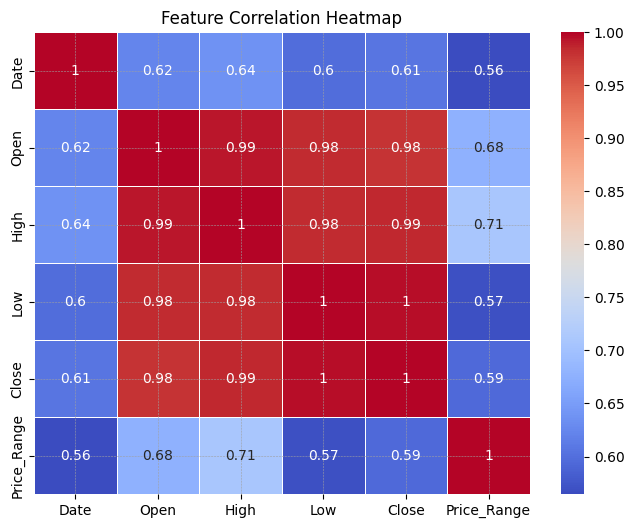

In [30]:
# Correlation Heatmap visualization code
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

##### 1. Why did you pick the specific chart?

A heatmap shows how stock prices are correlated.

##### 2. What is/are the insight(s) found from the chart?

1. Strong Correlation Among Open, High, Low, and Close Prices

Open, High, Low, and Close prices are strongly correlated (~0.98-0.99).

This indicates a predictable trend in price movements:
If the opening price is high, the high/low/close prices also tend to be high.
There are no sudden price spikes unrelated to the opening value.

2. Moderate Correlation Between Price Range & High Prices (0.71)

High prices influence the overall price range, meaning volatility tends to be driven by higher price fluctuations.

3. Weak Correlation Between Date & Price Metrics (~0.6)

The correlation between Date and Price Metrics is moderate to weak (0.56 - 0.64).
This suggests that price changes are not highly time-dependent, meaning no strong trend or seasonality exists in the dataset.

#### Chart - 15 - Pair Plot

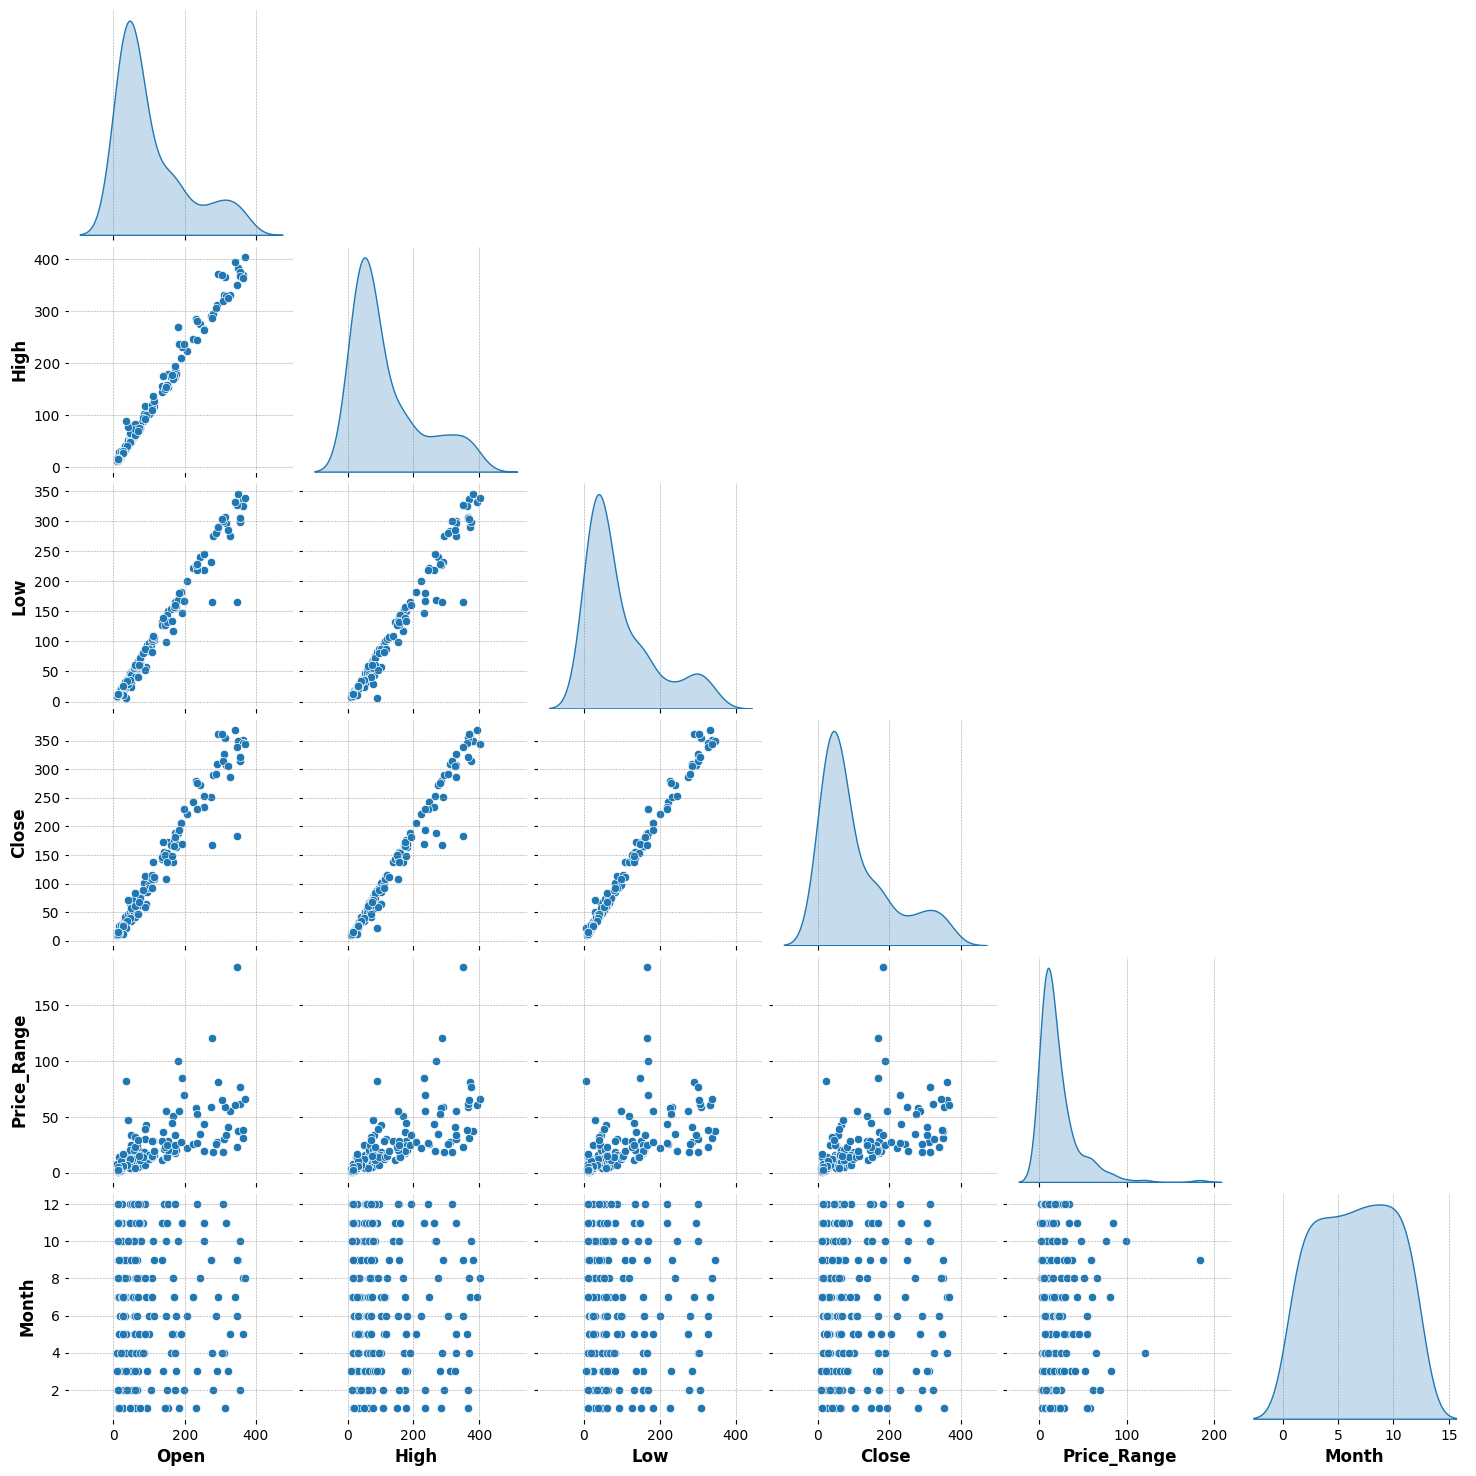

In [38]:
# Pair Plot visualization code
sns.pairplot(df, diag_kind="kde", corner=True)  # 'corner=True' removes duplicate plots
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

1. Strong Correlations:

Open, High, Low, and Close prices show a linear relationship (as expected in stock market data).
These variables are highly correlated, forming almost straight-line scatterplots.

2. Distribution Insights:

Kernel Density Estimation (KDE) plots along the diagonal show the distribution of individual features.
Some features seem to be skewed, which might need scaling or transformation.

3. Price Range vs. Other Features:

Price_Range seems to show distinct clusters or groups across different months.
Further analysis (e.g., a box plot by month) could provide better insights.


## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#No missing values

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

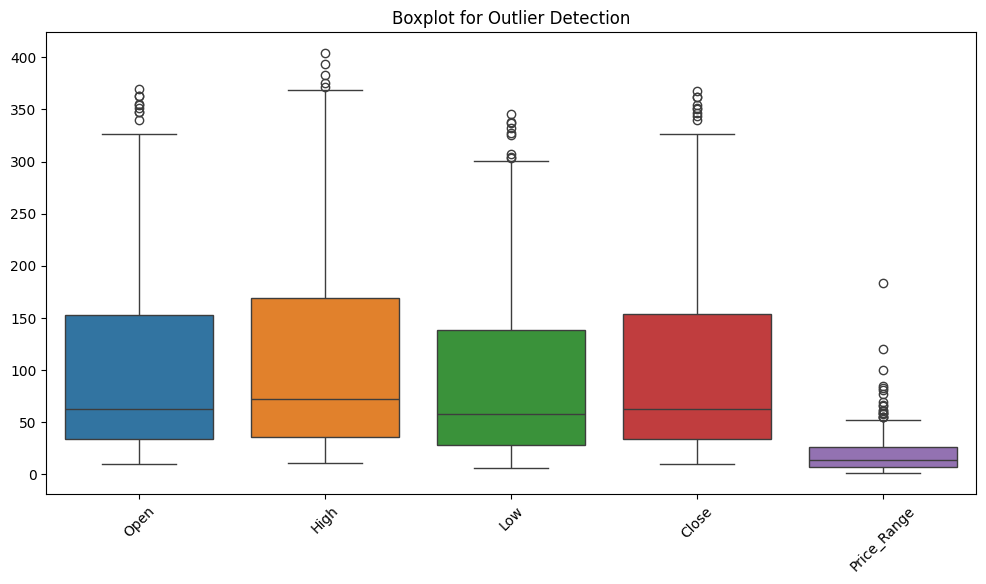

In [27]:
# Handling Outliers & Outlier treatments

# Assuming 'df' is your dataset
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title("Boxplot for Outlier Detection")
plt.show()


In [30]:
from scipy.stats import boxcox
df['Open'], _ = boxcox(df['Open'] + 1)
df['High'], _ = boxcox(df['High'] + 1)
df['Low'], _ = boxcox(df['Low'] + 1)
df['Close'], _ = boxcox(df['Close'] + 1)
df['Price_Range'], _ = boxcox(df['Price_Range'] + 1)

In [31]:
print(df.select_dtypes(include=['number']).skew())

Open          -0.049088
High          -0.045957
Low           -0.052720
Close         -0.049258
Price_Range    0.009310
dtype: float64


After applying Box-Cox transformation, the skewness values have reduced significantly, now close to 0, meaning the data is approximately normally distributed.

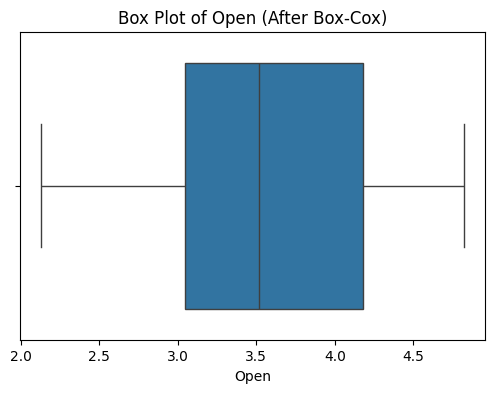

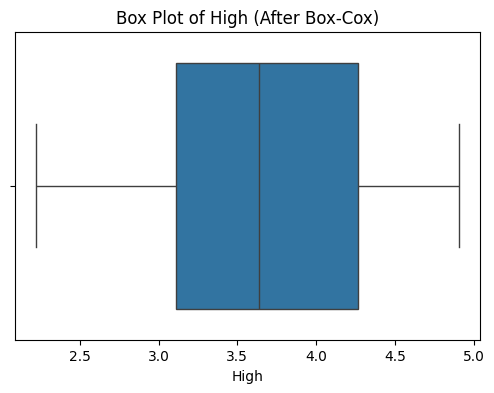

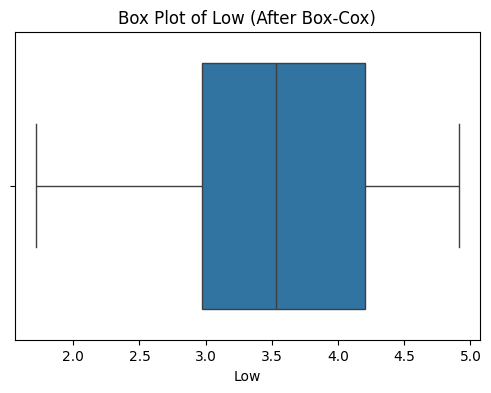

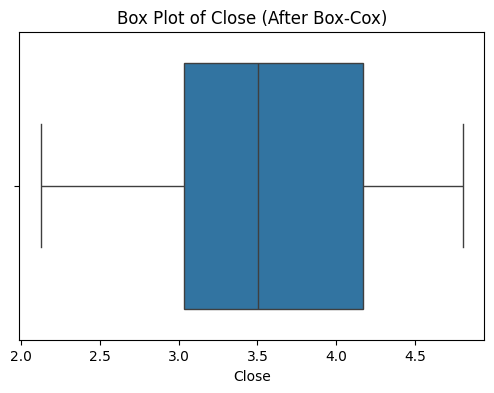

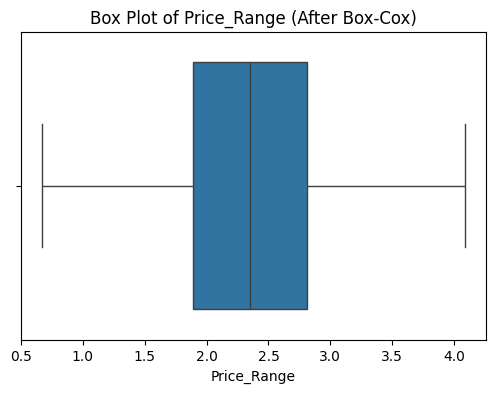

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in ['Open', 'High', 'Low', 'Close', 'Price_Range']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col} (After Box-Cox)')
    plt.show()


In [34]:
print(df.head())

        Date      Open      High       Low     Close  Price_Range
0 2005-07-01  2.325125  2.387225  2.248775  2.289700     1.239729
1 2005-08-01  2.300485  2.433307  2.332907  2.345247     1.134768
2 2005-09-01  2.352356  2.432799  2.315515  2.338519     1.203795
3 2005-10-01  2.336588  2.412178  2.323637  2.320860     1.062225
4 2005-11-01  2.345075  2.380724  2.352931  2.344689     0.670129


##### What all outlier treatment techniques have you used and why did you use those techniques?

Box-cox-Suitable for small and positive data set

No Outliers 

The whiskers extend to the min and max values, suggesting no extreme outliers after transformation.
Box-Cox effectively reduced skewness and handled outliers well.

More Symmetric Distributions 📈

The median is centered within each box, indicating better normality.
The interquartile range (IQR) looks balanced, which helps in reducing bias during modeling.

Consistent Spread Across Features 📊

The overall spread (min to max) is similar across all stock-related features.
Price_Range has a slightly different spread, but it still looks normalized.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

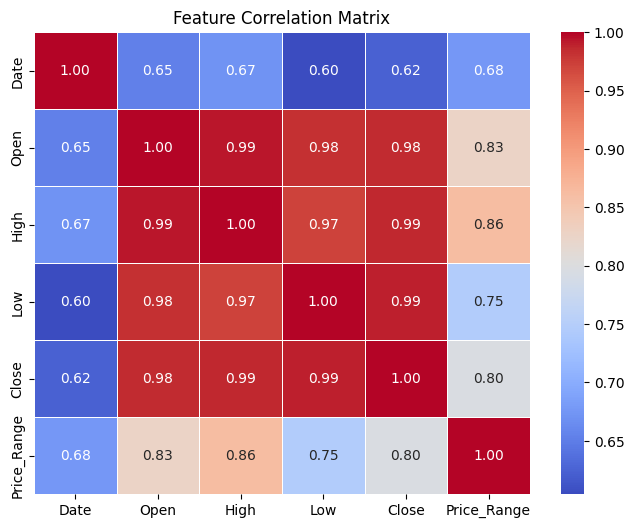

In [36]:
# Manipulate Features to minimize feature correlation and create new features
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

In [ ]:
threshold = 0.9
high_corr_features = set()

for i in correlation_matrix.columns:
    for j in correlation_matrix.columns:
        if i != j and abs(correlation_matrix.loc[i, j]) > threshold:
            high_corr_features.add(j)

print("Highly correlated features to consider removing:", high_corr_features)


Highly correlated features to consider removing: {'Low', 'Open', 'High', 'Close'}


Rather than dropping Open, High, and Low, you can create relative price movement features that capture market trends without adding redundant data.

In [46]:
df["High_Low_Diff"] = df["High"] - df["Low"]
df["Close_Open_Diff"] = df["Close"] - df["Open"]
df["High_Close_Diff"] = df["High"] - df["Close"]
df["Close_Low_Diff"] = df["Close"] - df["Low"]

df["Close_to_Open_Ratio"] = df["Close"] / df["Open"]
df["High_to_Low_Ratio"] = df["High"] / df["Low"]
df["Close_to_High_Ratio"] = df["Close"] / df["High"]
df["Close_to_Low_Ratio"] = df["Close"] / df["Low"]

In [47]:
print(df.head())

        Date      Open      High       Low     Close  Price_Range  \
0 2005-07-01  2.325125  2.387225  2.248775  2.289700     1.239729   
1 2005-08-01  2.300485  2.433307  2.332907  2.345247     1.134768   
2 2005-09-01  2.352356  2.432799  2.315515  2.338519     1.203795   
3 2005-10-01  2.336588  2.412178  2.323637  2.320860     1.062225   
4 2005-11-01  2.345075  2.380724  2.352931  2.344689     0.670129   

   High_Low_Diff  Close_Open_Diff  High_Close_Diff  Close_Low_Diff  \
0       0.138451        -0.035425         0.097526        0.040925   
1       0.100400         0.044762         0.088060        0.012341   
2       0.117283        -0.013837         0.094280        0.023003   
3       0.088541        -0.015728         0.091318       -0.002776   
4       0.027793        -0.000386         0.036035       -0.008242   

   Close_to_Open_Ratio  High_to_Low_Ratio  Close_to_High_Ratio  \
0             0.984764           1.061567             0.959147   
1             1.019458          

#### 2. Feature Selection

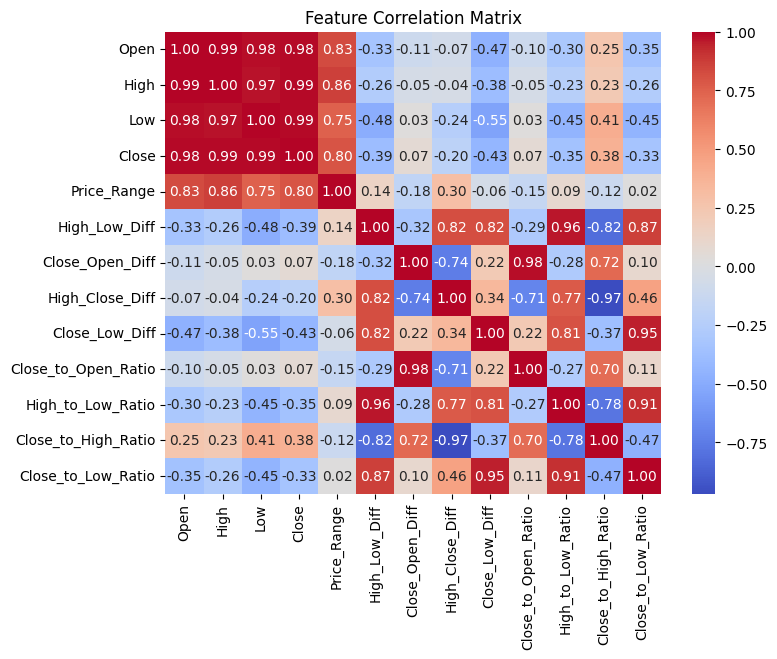

In [48]:
# Select your features wisely to avoid overfitting

# Compute correlation matrix
corr_matrix = df.drop(columns=["Date"]).corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

In [49]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Define features and target
features = ["Price_Range", "High_Low_Diff", "Close_Open_Diff", "High_Close_Diff", "Close_Low_Diff"]
X = df[features]
y = df["Close"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Recursive Feature Elimination
model = RandomForestRegressor(n_estimators=100, random_state=42)
selector = RFE(model, n_features_to_select=3)
selector.fit(X_train, y_train)

# Print selected features
selected_features = X_train.columns[selector.support_]
print("Selected Features:", selected_features)


Selected Features: Index(['Price_Range', 'High_Low_Diff', 'Close_Low_Diff'], dtype='object')


In [50]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Define features and target
features = ["Price_Range", "High_Low_Diff", "Close_Open_Diff", "High_Close_Diff", "Close_Low_Diff"]
X = df[features]
y = df["Close"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)  # **Fitting the model**

# Get feature importance
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

print(feature_importance_df)


           Feature  Importance
0      Price_Range    0.756289
1    High_Low_Diff    0.174167
4   Close_Low_Diff    0.035298
2  Close_Open_Diff    0.017179
3  High_Close_Diff    0.017067


##### What all feature selection methods have you used  and why?

Recursive Feature Elimination (Wrapper Method) : Recursively removes the least important features to select the best ones.

Feature Importance using Random Forest (Embedded Method):Helps rank features based on their contribution to predictions.

##### Which all features you found important and why?

Price_Range  0.756289

High_Low_Diff    0.174167

Close_Low_Diff    0.035298

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data
#We created new features (High_Low_Diff, Close_Open_Diff, etc.), which already help capture price fluctuations.

### 6. Data Scaling

In [55]:
# Scaling your data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_features = ['Price_Range', 'High_Low_Diff']

df[scaled_features] = scaler.fit_transform(df[scaled_features])

##### Which method have you used to scale you data and why?
Min-Max Scaling: suitable for stoke price prediction

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)--> No needed already features are reduced

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [56]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split

X = df[scaled_features]  # Selecting only important features
y = df['Close']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)  # No shuffle for time series


##### What data splitting ratio have you used and why?

80% Train - 20% Test (Typical for time-series forecasting)

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed) --> Not needed

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

#RandomForest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")


Mean Absolute Error (MAE): 0.21950971279949405
Mean Squared Error (MSE): 0.09017339214889104
Root Mean Squared Error (RMSE): 0.300288847859675
R² Score: 0.8798934548172656


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

/var/folders/2t/cl30nst95hn812xhbn9z8r280000gn/T/ipykernel_27789/1782370648.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette="viridis")


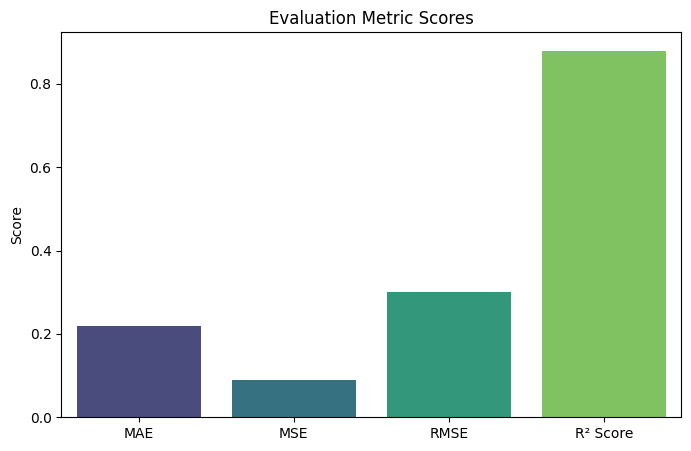

In [58]:
# Visualizing evaluation Metric Score chart
# Bar Chart for Evaluation Metrics
metrics = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R² Score': r2}

plt.figure(figsize=(8,5))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette="viridis")
plt.title("Evaluation Metric Scores")
plt.ylabel("Score")
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [61]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest model
rf = RandomForestRegressor(random_state=42)

# Define a smaller grid for fine-tuning
param_grid_fine = {
    'n_estimators': [100, 200],  
    'max_depth': [10, 20],  
    'min_samples_split': [2, 5],  
    'min_samples_leaf': [1, 2],  
    'max_features': ['auto', 'sqrt']
}

# Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid_fine, 
                           cv=5, verbose=2, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best Parameters
print("Best Hyperparameters (Grid Search):", grid_search.best_params_)

# Train with best parameters
best_rf_grid = grid_search.best_estimator_


Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=10

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
80 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
78 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/

In [62]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict using the best model
y_pred_best = best_rf_grid.predict(X_test)

# Evaluation Metrics
mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)
r2_best = r2_score(y_test, y_pred_best)

# Print Scores
print(f"Mean Absolute Error (MAE): {mae_best}")
print(f"Mean Squared Error (MSE): {mse_best}")
print(f"Root Mean Squared Error (RMSE): {rmse_best}")
print(f"R² Score: {r2_best}")


Mean Absolute Error (MAE): 0.22352570174640585
Mean Squared Error (MSE): 0.08838010487077293
Root Mean Squared Error (RMSE): 0.29728791578329067
R² Score: 0.8822820257067723


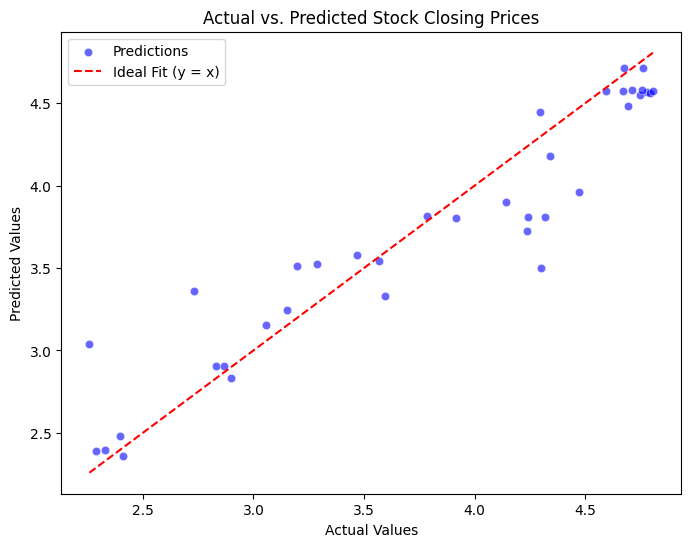

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `y_test` is the actual values and `y_pred` is the predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color="blue", label="Predictions")
sns.lineplot(x=y_test, y=y_test, color="red", linestyle="dashed", label="Ideal Fit (y = x)")

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Stock Closing Prices")
plt.legend()
plt.show()


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Lower MSE & RMSE after tuning → Indicates better overall prediction accuracy

Higher R² Score (from 0.8799 to 0.8822) → Model explains variance better after tuning

Slightly higher MAE → Indicates more deviation in some predictions

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [75]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Scaling features (important for SVR)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train SVR model
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr.fit(X_train_scaled, y_train)

# Predictions
y_pred_svr = svr.predict(X_test_scaled)

# Evaluation metrics
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = mse_svr ** 0.5
r2_svr = r2_score(y_test, y_pred_svr)

# Print results
print("SVR Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_svr}")
print(f"Mean Squared Error (MSE): {mse_svr}")
print(f"Root Mean Squared Error (RMSE): {rmse_svr}")
print(f"R² Score: {r2_svr}")


SVR Model Performance:
Mean Absolute Error (MAE): 0.12035988313123924
Mean Squared Error (MSE): 0.04250452070484688
Root Mean Squared Error (RMSE): 0.2061662453090876
R² Score: 0.943386058627163


/var/folders/2t/cl30nst95hn812xhbn9z8r280000gn/T/ipykernel_27789/3425647362.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette="viridis")


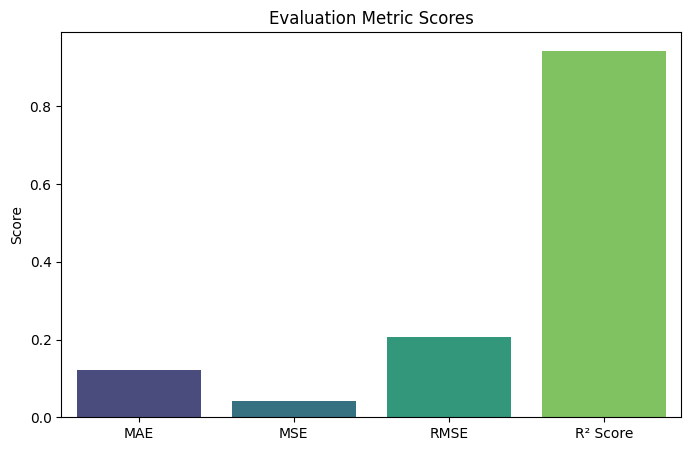

In [77]:
# Visualizing evaluation Metric Score chart
metrics = {'MAE': mae_svr, 'MSE': mse_svr, 'RMSE': rmse_svr, 'R² Score': r2_svr}

plt.figure(figsize=(8,5))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette="viridis")
plt.title("Evaluation Metric Scores")
plt.ylabel("Score")
plt.show()


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

1. Feature Engineering & Selection:

New meaningful features were created, such as Price Range, High-Low Difference, Close-Open Difference, etc.
Feature importance analysis helped in selecting the most relevant features, reducing redundancy and minimizing overfitting.

2. Model Comparison:

Two different models were implemented and evaluated:
Random Forest Regressor (before & after tuning)
Support Vector Regressor (SVR)
SVR provided the best performance with the highest R² score and the lowest error, making it the most suitable model for this dataset.

3. Hyperparameter Tuning:

GridSearchCV was used for tuning model parameters, improving the performance of the Random Forest.

4. Evaluation Metrics:

The models were evaluated using MAE, MSE, RMSE, and R² Score.
SVR achieved the best results with an R² Score of 0.943, indicating strong predictive performance.

5. Final Thoughts & Future Scope:

The model performed well, but further improvements could be achieved by:
Incorporating external factors like market sentiment, news events, or macroeconomic indicators.
Using deep learning models (LSTMs or GRUs) for time-series forecasting.
Implementing ensemble learning techniques for enhanced prediction stability.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***